In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import warnings #警告
from sklearn.preprocessing import MinMaxScaler #归一化

#LSTM
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
# from keras.optimizers import SGD 
from tensorflow.keras.optimizers import Adam,Nadam, SGD  #随机梯度下降法


mpl.rcParams['font.sans-serif'] = ['FangSong']  # 显示中文
mpl.rcParams['axes.unicode_minus'] = False  # 不使用unicode_minus模式处理坐标轴轴线为负数的情况
warnings.filterwarnings("ignore") #去掉警告

In [14]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime as dt

mpl.rcParams['font.sans-serif'] = ['FangSong']
mpl.rcParams['axes.unicode_minus'] = False

from IPython.display import display
df = pd.read_excel("D:datasets/mldata/RunData.XLS",sheet_name = '#1',index_col='DetailTime')
df.head()

,UnitNum,Tag1,Tag2,Tag3,Tag4,Tag5,Tag6,Tag7,Tag8,Tag9,...,Tag57,Tag58,Tag59,Tag60,Tag61,Tag62,Tag63,Tag64,Tag65,Tag66
DetailTime,,,,,,,,,,,,,,,,,,,,,
NaT,单位,t/h,t/h,℃,kPa,℃,NaN,kPa,℃,kPa,...,kPa,℃,%,r/min,h,MW,NaN,NaN,NaN,NaN
2014-12-15 06:24:08.000,说明,空气质量流量,天然气质量流量,大气温度,大气压力,压气机进口空气温度,压气机压比,压气机进口空气压力,压气机出口空气温度,压气机出口空气压力,...,凝汽器压力,天然气加热器进口燃气温度,大气湿度,转速,运行小时数,联合循环功率,联合循环功率因素,联合循环频率,联合循环励磁电流,联合+A3+AT3:AT3:BP3
2014-12-29 08:16:08.000,1,2342.718896,49.262232,5.810559,101.983559,5.166665,15.798577,101.192748,379.742126,1595.950372,...,5.240098,11.046362,58.938324,3000.36499,35199.289062,376.40625,0.377813,49.506954,1729.717773,547.51239
2014-12-25 08:56:08.000,1,2342.678906,48.26388,5.146191,103.060494,4.682627,15.78881,102.283836,373.842743,1596.508302,...,6.11194,12.450884,65.561295,2999.987549,35124.476562,376.387146,0.643795,49.5746,1701.042114,539.792358
2014-12-29 08:17:07.797,1,2343.090234,49.262579,6.192057,101.983486,5.138834,15.798322,101.190896,379.542938,1595.923091,...,5.24446,11.071339,57.544735,3000.166016,35199.304688,376.319122,0.37971,49.508347,1706.046997,547.743958


In [17]:
col_rename = []
for i in range(0,67):
    col_rename.append(df.iloc[1,i])
df.columns = col_rename
df = df.drop(df.index[0:2].values)
df.head()

,说明,空气质量流量,天然气质量流量,大气温度,大气压力,压气机进口空气温度,压气机压比,压气机进口空气压力,压气机出口空气温度,压气机出口空气压力,...,凝汽器压力,天然气加热器进口燃气温度,大气湿度,转速,运行小时数,联合循环功率,联合循环功率因素,联合循环频率,联合循环励磁电流,联合+A3+AT3:AT3:BP3
DetailTime,,,,,,,,,,,,,,,,,,,,,
2014-12-29 08:16:08.000,1,2342.718896,49.262232,5.810559,101.983559,5.166665,15.798577,101.192748,379.742126,1595.950372,...,5.240098,11.046362,58.938324,3000.36499,35199.289062,376.40625,0.377813,49.506954,1729.717773,547.51239
2014-12-25 08:56:08.000,1,2342.678906,48.26388,5.146191,103.060494,4.682627,15.78881,102.283836,373.842743,1596.508302,...,6.11194,12.450884,65.561295,2999.987549,35124.476562,376.387146,0.643795,49.5746,1701.042114,539.792358
2014-12-29 08:17:07.797,1,2343.090234,49.262579,6.192057,101.983486,5.138834,15.798322,101.190896,379.542938,1595.923091,...,5.24446,11.071339,57.544735,3000.166016,35199.304688,376.319122,0.37971,49.508347,1706.046997,547.743958
2014-12-25 08:57:08.000,1,2338.553101,48.2672,4.52215,103.060957,4.720131,15.788899,102.289666,373.534363,1596.55645,...,6.115463,12.45035,63.492619,3001.228027,35124.492188,376.30957,0.645896,49.575893,1683.886597,538.26593
2014-12-25 08:58:07.797,1,2340.647314,48.27052,5.741402,103.061421,4.759082,15.788988,102.302531,373.56601,1596.604597,...,6.118979,12.449816,66.488007,3000.366211,35124.507812,376.232025,0.647996,49.57719,1684.195312,539.347046


In [18]:
train_set=df[:'2014-12-30'].iloc[:,62:63].values #训练集，获取联合循环功率
test_set=df['2014-12-31':].iloc[:,62:63].values #测试集，获取联合循环功率

train_set2=df[:'2014-12-30'].iloc[:,64:65].values #训练集，获取联合循环频率
test_set2=df['2014-12-31':].iloc[:,64:65].values #测试集，获取联合循环频率

In [19]:
print(test_set)

[[372.3816833496094]
 [372.23248291015625]
 [372.1939392089844]
 ...
 [57.19228744506836]
 [35.88385009765625]
 [17.17129135131836]]


In [6]:
from sklearn.preprocessing import MinMaxScaler #归一化

sc=MinMaxScaler(feature_range=[0,1])
train_set_scaled=sc.fit_transform(train_set.reshape(-1,1))

#创建序列数据集（训练和测试）
#60个时间步为一个样本，1个输出
x_train=[]
y_train=[]
for i in range(60,7236):
    x_train.append(train_set_scaled[i-60:i])  #0代表第一列数据
    y_train.append(train_set_scaled[i])
X_train,Y_train=np.array(x_train),np.array(y_train)   #numpy转换
X_train.shape 

(7176, 60, 1)

In [7]:
print(train_set_scaled[2])

[0.99976782]


In [8]:
#层数太多，会影响训练结果
model = Sequential()
#LSTM第一层
model.add(LSTM(128,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
#return_sequences
#我们可以把很多LSTM层串在一起，但是最后一个LSTM层return_sequences通常为false

#LSTM第二层
model.add(LSTM(128,return_sequences=True))
model.add(Dropout(0.2))

#LSTM第三层
model.add(LSTM(128))
model.add(Dropout(0.2))

#Dense层
model.add(Dense(units=1)) #预测值一维

In [9]:
#模型编译
model.compile(optimizer='adam',loss='mae')  #loss损失函数

#模型训练
model.fit(X_train,Y_train,epochs=20,batch_size=72) #跑20次，每批32个数据

# batch_size是每次梯度更新的样本数，未写明则为32
# 它主要的作用其实是用较少的样本获得合适的优化模型的梯度方向，避免全样本迭代时过高的内存占用
# epochs是指训练模型迭代次数，可以理解为我们遍历了一次所有的模型，则为1次epoch


#loss损失值逐渐下降

Epoch 1/20
100/100 [==============================] - 18s 148ms/step - loss: 0.0919
Epoch 2/20
100/100 [==============================] - 15s 147ms/step - loss: 0.0440
Epoch 3/20
100/100 [==============================] - 15s 150ms/step - loss: 0.0469
Epoch 4/20
100/100 [==============================] - 15s 152ms/step - loss: 0.0431
Epoch 5/20
100/100 [==============================] - 15s 148ms/step - loss: 0.0407
Epoch 6/20
100/100 [==============================] - 15s 147ms/step - loss: 0.0389
Epoch 7/20
100/100 [==============================] - 14s 144ms/step - loss: 0.0374
Epoch 8/20
100/100 [==============================] - 14s 143ms/step - loss: 0.0390
Epoch 9/20
100/100 [==============================] - 14s 144ms/step - loss: 0.0361
Epoch 10/20
100/100 [==============================] - 15s 153ms/step - loss: 0.0357
Epoch 11/20
100/100 [==============================] - 15s 148ms/step - loss: 0.0384
Epoch 12/20
100/100 [==============================] - 15s 150ms/step - lo

In [8]:
#拼接数据集
dataset_total=pd.concat((df['联合循环功率'][:'2014-12-30'],df['联合循环功率']['2014-12-31':]),axis=0) #在纵轴（0轴）进行拼接
#获取输入数据
inputs=dataset_total[len(dataset_total)-len(test_set)-60:].values
print(inputs)
#归一化
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

inputs.shape

[46.54159927368164 46.231834411621094 45.04301834106445 ...
 57.19228744506836 35.88385009765625 17.17129135131836]


(1516, 1)

In [9]:
#准备测试集X_test,进行联合循环功率预测
X_test = []
for i in range(60,1516):
    X_test.append(inputs[i-60:i])
    
X_test = np.array(X_test) #numpy转换

X_test.shape

(1456, 60, 1)

In [10]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape #三维模式

(1456, 60, 1)

In [14]:
predict_test = model.predict(X_test)
predict_test.shape #预测结果与预测数据大小一样，都是1456

(1456, 1)

In [15]:
predict_result=sc.inverse_transform(predict_test)

In [16]:
predict_result #真实值

array([[  7.1392937],
       [ 16.159266 ],
       [ 38.09179  ],
       ...,
       [200.65347  ],
       [183.00249  ],
       [163.2223   ]], dtype=float32)

In [11]:
print(test_set)

[[372.3816833496094]
 [372.23248291015625]
 [372.1939392089844]
 ...
 [57.19228744506836]
 [35.88385009765625]
 [17.17129135131836]]


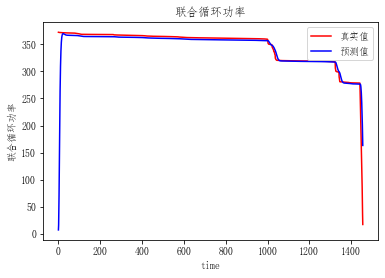

[[  7.1392937]
 [ 16.159266 ]
 [ 38.09179  ]
 [ 71.479126 ]
 [112.08713  ]] [[372.3816833496094]
 [372.23248291015625]
 [372.1939392089844]
 [372.0504150390625]
 [372.0062255859375]]


In [20]:
def plot_predictions(test_result,predict_result):
    """
    test_result 真实值
    predict_result 预测值
    """
    plt.plot(test_result,color='red',label='真实值')
    plt.plot(predict_result,color='blue',label='预测值')
    plt.title('联合循环功率')
    plt.xlabel('time')
    plt.ylabel('联合循环功率')
    plt.legend()#图例
    plt.show()

#绘制测试结果和预测结果
plot_predictions(test_set,predict_result)
print(predict_result[0:5],test_set[0:5])

In [18]:
target = test_set
prediction = predict_result

In [19]:
from math import sqrt

error = []
for i in range(len(target)):
    error.append(target[i] - prediction[i])
    
    
# print("Errors: ", error)
# print(error)

squaredError = []
absError = []
for val in error:
    squaredError.append(val * val)#target-prediction之差平方 
    absError.append(abs(val))#误差绝对值
 
 
# print("Square Error: ", squaredError)
# print("Absolute Value of Error: ", absError)
 
print("MSE = ", sum(squaredError) / len(squaredError))#均方误差MSE
 
print("RMSE = ", sqrt(sum(squaredError) / len(squaredError)))#均方根误差RMSE
print("MAE = ", sum(absError) / len(absError))#平均绝对误差MAE


MSE =  [567.5343714416551]
RMSE =  23.822979902641382
MAE =  [5.636380720924545]


In [306]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime as dt

mpl.rcParams['font.sans-serif'] = ['FangSong']
mpl.rcParams['axes.unicode_minus'] = False

from IPython.display import display
df = pd.read_excel("D:datasets\mldata\RunData.XLS",sheet_name = '#1',index_col='DetailTime')

col_rename = []
for i in range(0,67):
    col_rename.append(df.iloc[1,i])
df.columns = col_rename
df = df.drop(df.index[0:2].values)


data = pd.concat((df['联合循环功率'],
                  df['中压过热器出口蒸汽流量'],
                  df['低压缸进口蒸汽压力'],
                     df['高压过热器出口蒸汽流量'],
                    df['空气质量流量'],
                    df['高压省煤器出口水温度'],
                    df['余热锅炉高压蒸发器出口烟气温度']
                ),axis = 1)
data = data.sort_values('DetailTime', ascending=True)
data.head()


,联合循环功率,中压过热器出口蒸汽流量,低压缸进口蒸汽压力,高压过热器出口蒸汽流量,空气质量流量,高压省煤器出口水温度,余热锅炉高压蒸发器出口烟气温度
DetailTime,,,,,,,
2014-12-24 18:39:07.797000,370.302521,39.153698,391.837476,286.615814,2317.957031,303.307709,320.271759
2014-12-24 18:40:07.797000,370.267059,39.154091,391.839649,286.624268,2317.783667,303.306458,320.27124
2014-12-24 18:41:07.797000,370.231567,39.154484,391.841849,286.632751,2317.610522,303.305237,320.270721
2014-12-24 18:42:07.797000,370.196106,39.154877,391.844015,286.641205,2317.132397,303.304016,320.270203
2014-12-24 18:43:07.797000,370.160614,39.15527,391.846215,286.649689,2307.988037,303.302765,320.269684


In [307]:
nxt = data['联合循环功率'].shift(-1)  #
nxt.name = 'next'
nxt[-1] = 1
nxt.tail()

DetailTime
2015-01-01 00:11:07.797000    87.065918
2015-01-01 00:12:07.797000    57.192287
2015-01-01 00:13:07.797000     35.88385
2015-01-01 00:14:07.797000    17.171291
2015-01-01 00:15:07.797000            1
Name: next, dtype: object

In [309]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#对风向字段进行编码

reframed = pd.concat((data,nxt), axis=1)

values = reframed.values

values = values.astype('float32')
#对数据进行标准化出来
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# 删除那些不需要预测的列
reframed.head()

,联合循环功率,中压过热器出口蒸汽流量,低压缸进口蒸汽压力,高压过热器出口蒸汽流量,空气质量流量,高压省煤器出口水温度,余热锅炉高压蒸发器出口烟气温度,next
DetailTime,,,,,,,,
2014-12-24 18:39:07.797000,370.302521,39.153698,391.837476,286.615814,2317.957031,303.307709,320.271759,370.267059
2014-12-24 18:40:07.797000,370.267059,39.154091,391.839649,286.624268,2317.783667,303.306458,320.27124,370.231567
2014-12-24 18:41:07.797000,370.231567,39.154484,391.841849,286.632751,2317.610522,303.305237,320.270721,370.196106
2014-12-24 18:42:07.797000,370.196106,39.154877,391.844015,286.641205,2317.132397,303.304016,320.270203,370.160614
2014-12-24 18:43:07.797000,370.160614,39.15527,391.846215,286.649689,2307.988037,303.302765,320.269684,370.125153


In [310]:
train_size = 7236

train = scaled[:train_size , : ]
test = scaled[train_size: , : ]
train_X ,train_y = train[:,:-1],train[:,-1]
test_X, test_y = test[:, :-1], test[:, -1]


train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
print(test.shape)

(7236, 1, 7) (7236,) (1456, 1, 7) (1456,)
(1456, 8)


In [311]:
print(train.shape)

(7236, 8)


In [312]:
print(train_X.shape[1], train_X.shape[2])

1 7


In [313]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import warnings #警告
from sklearn.preprocessing import MinMaxScaler #归一化

#LSTM
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
# from keras.optimizers import SGD 
from tensorflow.keras.optimizers import Adam,Nadam, SGD  #随机梯度下降法


mpl.rcParams['font.sans-serif'] = ['FangSong']  # 显示中文
mpl.rcParams['axes.unicode_minus'] = False  # 不使用unicode_minus模式处理坐标轴轴线为负数的情况
warnings.filterwarnings("ignore") #去掉警告

# 创建模型
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 50)                11600     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 51        
Total params: 11,651
Trainable params: 11,651
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/200
101/101 - 1s - loss: 0.1883 - val_loss: 0.0257
Epoch 2/200
101/101 - 0s - loss: 0.0320 - val_loss: 0.0347
Epoch 3/200
101/101 - 0s - loss: 0.0280 - val_loss: 0.0238
Epoch 4/200
101/101 - 0s - loss: 0.0368 - val_loss: 0.0206
Epoch 5/200
101/101 - 0s - loss: 0.0251 - val_loss: 0.0268
Epoch 6/200
101/101 - 0s - loss: 0.0292 - val_loss: 0.0244
Epoch 7/200
101/101 - 0s - loss: 0.0283 - val_loss: 0.0274
Epoch 8/200
101/101 - 0s - loss: 0.0258 - val_loss: 0.0205
Epoch 9/200
101/101 - 0s - loss: 0.0231 - val_loss: 0.0153
Epoch 10/200
101/101 - 0s - loss: 0.0225 - val_loss: 0.0195
Epoch 11/200
101/101 - 0s - loss: 0.0191 - val_loss: 0.0134
Epoch 12/200
101/101 - 0s - loss: 0.0201 - val_loss: 0.0157
Epoch 13/200
101/101 - 0s - loss: 0.0175 - val_loss: 0.0140
Epoch 14/200
101/101 - 0s - loss: 0.0182 - val_loss: 0.0157
Epoch 15/200
101/101 - 0s - loss: 0.0168 - val_loss: 0.0163
Epoch 16/200
101/101 - 0s - loss: 0.0166 - val_loss: 0.0098
Epoch 17/200
101/101 - 0s - loss: 0.0169 - val_lo

101/101 - 0s - loss: 0.0085 - val_loss: 0.0047
Epoch 138/200
101/101 - 0s - loss: 0.0090 - val_loss: 0.0051
Epoch 139/200
101/101 - 0s - loss: 0.0079 - val_loss: 0.0047
Epoch 140/200
101/101 - 0s - loss: 0.0068 - val_loss: 0.0050
Epoch 141/200
101/101 - 0s - loss: 0.0078 - val_loss: 0.0087
Epoch 142/200
101/101 - 0s - loss: 0.0089 - val_loss: 0.0056
Epoch 143/200
101/101 - 0s - loss: 0.0075 - val_loss: 0.0061
Epoch 144/200
101/101 - 0s - loss: 0.0111 - val_loss: 0.0051
Epoch 145/200
101/101 - 0s - loss: 0.0088 - val_loss: 0.0064
Epoch 146/200
101/101 - 0s - loss: 0.0072 - val_loss: 0.0051
Epoch 147/200
101/101 - 0s - loss: 0.0087 - val_loss: 0.0053
Epoch 148/200
101/101 - 0s - loss: 0.0070 - val_loss: 0.0052
Epoch 149/200
101/101 - 0s - loss: 0.0090 - val_loss: 0.0073
Epoch 150/200
101/101 - 0s - loss: 0.0066 - val_loss: 0.0052
Epoch 151/200
101/101 - 0s - loss: 0.0113 - val_loss: 0.0074
Epoch 152/200
101/101 - 0s - loss: 0.0082 - val_loss: 0.0057
Epoch 153/200
101/101 - 0s - loss: 0.0

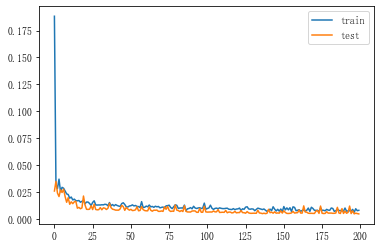

In [314]:
# 训练模型
history = model.fit(train_X, train_y, epochs=200, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# 对损失进行可视化
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [279]:

print(yhat.shape)
print(test_X[:,1:].shape)
inv_yhat = np.concatenate((yhat, test_X), axis=1)
print(inv_yhat.shape)
inv_yhat = scaler.inverse_transform(inv_yhat)
print(inv_yhat[:,0])
inv_yhat = inv_yhat[:,0]
inv_yhat
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
print(inv_yhat)
inv_y


(1456, 1)
(1456, 7)
(1456, 9)
[370.8802  372.42792 371.71246 ...  79.35896  65.27519  53.95945]
[370.8802  372.42792 371.71246 ...  79.35896  65.27519  53.95945]


array([368.29318  , 368.2938   , 368.29437  , ...,  36.022324 ,
        17.317375 ,   1.1526595], dtype=float32)

In [318]:
print(test_X[1455])

[0.04268748 0.         0.01069367 0.5902009  0.6234863  0.7904227
 0.7809752 ]


In [315]:
from sklearn.metrics import mean_squared_error
# 对测试集进行预测
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# 对预测值进行逆标准处理
inv_yhat = np.concatenate((yhat, test[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# 对测试集标签进行逆标准化处理
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# 计算 RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 3.306


In [319]:
pre = model.predict(test_X[1455])

ValueError: in user code:

    D:\ANACONDA\lib\site-packages\keras\engine\training.py:1586 predict_function  *
        return step_function(self, iterator)
    D:\ANACONDA\lib\site-packages\keras\engine\training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    D:\ANACONDA\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    D:\ANACONDA\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    D:\ANACONDA\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    D:\ANACONDA\lib\site-packages\keras\engine\training.py:1569 run_step  **
        outputs = model.predict_step(data)
    D:\ANACONDA\lib\site-packages\keras\engine\training.py:1537 predict_step
        return self(x, training=False)
    D:\ANACONDA\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    D:\ANACONDA\lib\site-packages\keras\engine\input_spec.py:214 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_11 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 1)
